In [ ]:
import google.auth
from google.colab import auth

auth.authenticate_user()

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!sudo apt-get -y -q update
!sudo apt-get -y -q install gcsfuse

deb http://packages.cloud.google.com/apt gcsfuse-bionic main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1974  100  1974    0     0  89727      0 --:--:-- --:--:-- --:--:-- 94000
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [43.2 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [4,114 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://packages.cloud.google.com/apt gcsfuse-bionic/main amd64 Packages [2,197 B]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release


In [ ]:
!mkdir folderOnColab
!gcsfuse gs://folderOnBucket folderOnColab
!gcsfuse --implicit-dirs homecolor_training_dataset folderOnColab

mkdir: cannot create directory ‘folderOnColab’: File exists
Using mount point: /content/folderOnColab
Opening GCS connection...
daemonize.Run: readFromProcess: sub-process: mountWithArgs: mountWithConn: fs.NewServer: SetUpBucket: OpenBucket: Unknown bucket "gs://folderOnBucket"
Using mount point: /content/folderOnColab
Opening GCS connection...
Mounting file system...
File system has been successfully mounted.


In [ ]:
X_train = np.load("/content/folderOnColab/PreprocessedTrainData/TrainData/2021-01-02 20:15:53.395318.npy")
Y_train = np.load("/content/folderOnColab/PreprocessedTrainData/Label/2021-01-02 20:15:53.395318.npy")
print(X_train.shape,Y_train.shape)

(18368, 224, 224, 1) (18368, 1257)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1974  100  1974    0     0  63677      0 --:--:-- --:--:-- --:--:-- 63677
OK
59 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 22.9 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.32.0_amd64.deb ...
Unpacking gcsfuse (0.32.0) ...
Setting up gcsfuse (0.32.0) ...


In [ ]:
!mkdir folder_colab
!gcsfuse --implicit-dirs homecolor_training_dataset folder_colab

mkdir: cannot create directory ‘folder_colab’: File exists
Using mount point: /content/folder_colab
Opening GCS connection...
Mounting file system...
File system has been successfully mounted.


In [ ]:
import shutil 
shutil.copytree("/content/drive/My Drive/weight", "/content/folder_colab/train_images")

FileExistsError: ignored

In [ ]:
from google.cloud import storage
client = storage.Client(project='homecolor')
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('homecolor_training_dataset')

In [ ]:
file=bucket.get_blob()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random
import numpy as np
import pandas as pd
import urllib
import os
from urllib.request import urlretrieve
import cv2
from datetime import datetime
from PIL import Image , ImageOps
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow 

In [ ]:
base_path = "/content/drive/My Drive/weight"
dirs = os.listdir("/content/drive/My Drive/weight")


In [ ]:
len(dirs)

1453

In [ ]:
folder_path = ""
image_data = []
labels = []
label_dict = {} 
dict_label = {}
for i in range(1453):
  label_dict[dirs[i]]=i
  dict_label[i] = dirs[i]

In [ ]:
img = image.load_img("/content/drive/MyDrive/weight/0007c48d-0809-4658-81c0-c1d93a0106a9/5e427bb2-24ce-4341-90cd-b6665f91ff90.png",target_size=(224,224))
print(image.img_to_array(ImageOps.grayscale(img)).shape)

(224, 224, 1)


In [ ]:
count = 0
co = 0
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    count=count+1
    ini =0
    for im in img_data:
      if ini>=24:
        break
      img = image.load_img(os.path.join(path,im),target_size=(224,224))
      img_array = image.img_to_array(ImageOps.grayscale(img))
      image_data.append(img_array)
      labels.append(label_dict[ix])
      co+=1
      ini+=1
      print(count,co,ini)

Streaming output truncated to the last 5000 lines.
153 3028 4
153 3029 5
153 3030 6
153 3031 7
153 3032 8
153 3033 9
153 3034 10
153 3035 11
153 3036 12
153 3037 13
153 3038 14
153 3039 15
153 3040 16
153 3041 17
153 3042 18
153 3043 19
153 3044 20
153 3045 21
153 3046 22
153 3047 23
153 3048 24
154 3049 1
154 3050 2
154 3051 3
154 3052 4
154 3053 5
154 3054 6
154 3055 7
154 3056 8
154 3057 9
154 3058 10
154 3059 11
154 3060 12
154 3061 13
154 3062 14
154 3063 15
154 3064 16
154 3065 17
154 3066 18
154 3067 19
154 3068 20
154 3069 21
154 3070 22
154 3071 23
154 3072 24
155 3073 1
155 3074 2
155 3075 3
155 3076 4
155 3077 5
155 3078 6
155 3079 7
155 3080 8
155 3081 9
155 3082 10
155 3083 11
155 3084 12
155 3085 13
155 3086 14
155 3087 15
155 3088 16
155 3089 17
155 3090 18
155 3091 19
155 3092 20
155 3093 21
155 3094 22
155 3095 23
155 3096 24
156 3097 1
156 3098 2
156 3099 3
156 3100 4
156 3101 5
156 3102 6
156 3103 7
156 3104 8
156 3105 9
156 3106 10
156 3107 11
156 3108 12
156 3109 1

In [ ]:
print(len(image_data), len(labels))


In [ ]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [ ]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

In [ ]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

In [ ]:
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_train = X_train.reshape(18368,224,224,3)

In [ ]:
print(X_train.shape,Y_train.shape)

(18368, 224, 224, 3) (18368, 1257)


In [ ]:
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train)

In [ ]:
model = ResNet50(include_top=False,weights=None,input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(10024,activation='relu')(av1)
fc2 = Dense(5120,activation='relu')(fc1)
fc3 = Dense(2500,activation='relu')(fc2)
d1 = Dropout(0.5)(fc3)
fc4 = Dense(1257,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc4)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
adam = Adam(lr=0.000007)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#for ix in range(140):
#    model_new.layers[ix].trainable = False
    
#model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 32,
                    epochs = 50,
                    validation_split=0.20)

Epoch 1/50
460/460 [==============================] - 87s 190ms/step - loss: 3.6014 - accuracy: 0.1585 - val_loss: 3.1057 - val_accuracy: 0.2300
Epoch 2/50
460/460 [==============================] - 87s 190ms/step - loss: 3.4341 - accuracy: 0.1802 - val_loss: 2.8924 - val_accuracy: 0.2880
Epoch 3/50
460/460 [==============================] - 87s 190ms/step - loss: 3.3125 - accuracy: 0.2011 - val_loss: 2.7602 - val_accuracy: 0.3046
Epoch 4/50
460/460 [==============================] - 87s 189ms/step - loss: 3.1493 - accuracy: 0.2180 - val_loss: 2.6498 - val_accuracy: 0.3236
Epoch 5/50
460/460 [==============================] - 87s 190ms/step - loss: 3.0180 - accuracy: 0.2462 - val_loss: 2.4336 - val_accuracy: 0.3625
Epoch 6/50
460/460 [==============================] - 87s 190ms/step - loss: 2.8874 - accuracy: 0.2607 - val_loss: 2.3197 - val_accuracy: 0.3911
Epoch 7/50
460/460 [==============================] - 87s 190ms/step - loss: 2.7424 - accuracy: 0.2827 - val_loss: 2.2491 - val_ac

In [ ]:
model_new.save_weights("model16.h5")

In [ ]:
import pickle 
  
  
try: 
    geeky_file = open('dict2final', 'wb') 
    pickle.dump(dict_label, geeky_file) 
    geeky_file.close() 
  
except: 
    print("Something went wrong")

In [ ]:
from keras.models import Model,load_model
model_new = load_model("/content/drive/My Drive/model9.h5")

ValueError: ignored

In [ ]:
model_new.load_weights("/content/drive/My Drive/model10.h5")

In [ ]:
import cv2

In [ ]:
cv2.show(X_tra)

In [ ]:
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/train_images.npy', 'rb') as f:
    a = np.load(f)

In [ ]:
a.shape

(2296, 224, 224, 3)

In [ ]:
from google.colab.patches import cv2_imshow 

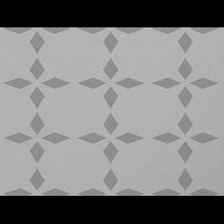

In [ ]:
cv2_imshow(X_train[7000])

In [ ]:
from google.colab import files
files.download('model16.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>